# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


---

**Баллы за задание:**

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (учитывается только в основной части курса, необходимо на "отл"):
* Задача 1 &mdash; 70 баллов

<b><a href="#Факультативная-часть" style="text-decoration: none;"><font color="green">Факультативная часть</font></a></b> (учитывается только в факультативной части курса):
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 70 баллов

**Внимание!** Указанные баллы являются бонусными. Они не учитываются в максимальных суммах баллов в знаменателе при вычислении процента выполненных заданий. Но все полученные вами баллы будут учтены в числителе. Тем самым, выполняя или не выполняя домашку, вы не сможете понизить оценку, но сможете ее повысить.

In [ ]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [31]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
import plotly.express as px
from ast import literal_eval  # конвертация str -> array

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны.

**Внимание!**
В первую очередь задание призвано помочь вам понять, какие навыки стоит развивать, и может быть даже выбрать подходящую кафедру. Однако, не стоит идти на работу/стажировку раньше времени. Даже только летнюю, абсолютное большинство людей не могут работать круглый год без перерыва. У всех из вас 3 курс достаточно нагруженный, а на DS-потоке нагрузка с первой недели сентября. И если вы идете на стажировку, то каникул у вас может просто не остаться. Даже если вам сейчас/летом/в сентябре кажется "я же справлюсь", к ноябрю-декабрю с большой вероятностью вы выдохнетесь. Таких примеров *очень много*. Не все, кто-то успешно справляется совмещать работу и учебу, но таких *очень мало*. Берегите себя и свое здоровье :)

---

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [ ]:
URL = "https://api.hh.ru/vacancies"

params = {
    "text": "Data Scientist",
    "area": 1,
    "page": 0,
    "per_page": 10,
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [ ]:
data["items"][1]

{'id': '98594437',
 'premium': False,
 'name': 'Data Scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 150000, 'to': None, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Ленинский проспект',
  'building': '2А',
  'lat': 55.728783,
  'lng': 37.610988,
  'description': None,
  'raw': 'Москва, Ленинский проспект, 2А',
  'metro': None,
  'metro_stations': [],
  'id': '14817849'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2024-05-08T09:40:53+0300',
 'created_at': '2024-05-08T09:40:53+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98594437',
 'show_logo_in_search': None,
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/98594437?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/985

Сколько всего найдено вакансий

In [ ]:
data["found"]

376

Количество страниц в результатах поиска

In [ ]:
data["pages"]

37

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [ ]:
df = pd.json_normalize(data["items"])
df.head()

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,department.id,department.name,insider_interview.id,insider_interview.url
0,98263959,False,Logistics Manager,NaN,False,False,None,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97153868,False,Junior Data Scientist (Ranking&Search),NaN,True,False,None,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98214631,False,Data Scientist,NaN,False,False,None,NaN,None,None,...,5.36,5,55.728994,37.622533,"[{'station_name': 'Добрынинская', 'line_name':...",1079022,NaN,NaN,NaN,NaN
3,98269481,False,Data Scientist / ML-инженер,NaN,False,False,None,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98088762,False,Junior data scientist (модели кредитного риска),NaN,False,False,None,NaN,None,None,...,2.512,2,55.695000,37.664167,"[{'station_name': 'Технопарк', 'line_name': 'З...",602591,80-80-expert,Альфа-Банк. Центральный офис,32631,https://hh.ru/interview/32631?employerId=80


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [ ]:
vacancy = df["id"].iloc[0]
vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

---

### <font color="orange"><i>Сложная часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [40]:
def get_request(text):
  params = {
    "text": text,
    "area": 1,
    "page": 0,
    "per_page": 100,
  }

  req = requests.get(URL, params)
  data = json.loads(req.content.decode())

  reqs = []
  for page in range(data["pages"]):
    params["page"] = page
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    reqs.append(pd.json_normalize(data["items"]))
    time.sleep(1)

  return pd.concat(reqs)

In [4]:
URL = "https://api.hh.ru/vacancies"
text = ["Data Scientist", "аналитик данных", "аналитик", "дата-сайентист"]

data = []
for vacancy in text:
  data.append(get_request(vacancy))
  time.sleep(1)

vacancies = pd.concat(data)


In [5]:
vacancies.head()

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,employer.logo_urls,department.id,department.name,insider_interview.id,insider_interview.url
0,98612984,False,Petroleum Engineer (Baku),NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98594437,False,Data Scientist,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97615359,False,Junior Data Scientist / Младший аналитик данных,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97153868,False,Junior Data Scientist (Ranking&Search),NaN,True,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98269481,False,Data Scientist / ML-инженер,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [6]:
vacancies = vacancies.drop_duplicates(subset='id')

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [41]:
def get_descriptions(data):
  full_desc = []
  sleepy_counter = 0  
  for id in data["id"].tolist():
    if sleepy_counter == 100:
      sleepy_counter = 0
      sleep(5)
    sleepy_counter += 1

    vacancy_url = f"https://api.hh.ru/vacancies/{id}"

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    full_desc.append(pd.json_normalize(vacancy_info))

  return pd.concat(full_desc)

In [17]:
full_descriptions = get_descriptions(vacancies)
full_descriptions.to_excel('vacancies_descr.xlsx')

/tmp/ipykernel_43004/4219038710.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(full_desc)


In [110]:
# подготовим данные для извлечения в таблицу
arr_columns = ["type.id", "open", "salary.currency", "salary.gross", "salary.from", "salary.to", "schedule.name", "address.lng", "address.lat", "department.name"]
descriptions_to_check = pd.DataFrame(full_descriptions, columns=arr_columns)
descriptions_to_check = descriptions_to_check.rename(columns={'type.id': 'id', 'open': 'актуальность', 'salary.currency': 'валюта', 
                                                              'salary.gross': 'гросс', 'salary.from': 'зарплата.от', 'salary.to': 'зарплата.до', 
                                                              'schedule.name': 'занятость', 'address.lng': 'долгота', 'address.lat': 'широта', 
                                                              'department.name': 'организация'})
descriptions_to_check.to_excel('good_vacancies_descriptions.xlsx')

In [10]:
full_descriptions = pd.read_excel('/home/daniil/IntroDS/vacancies_descr.xlsx')

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [4]:
full_descriptions[full_descriptions['type.id'] == 'open'].shape[0]

1609

**Ответ:** на данный момент доступно $1609$ вакансий.

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [18]:
# удалим пустые ячейки
skills = full_descriptions.key_skills.dropna()
# приведем все к нижнему регистру
skills = skills.str.lower()

# literal_eval переводит '[1, 2, 3]' в [1, 2, 3]
dict_skills = {}
for elem in skills:
  for skill in literal_eval(elem):
    name = list(skill.values())[0]
    if name not in dict_skills.keys():
      dict_skills[name] = 1
    else:
      dict_skills[name] += 1

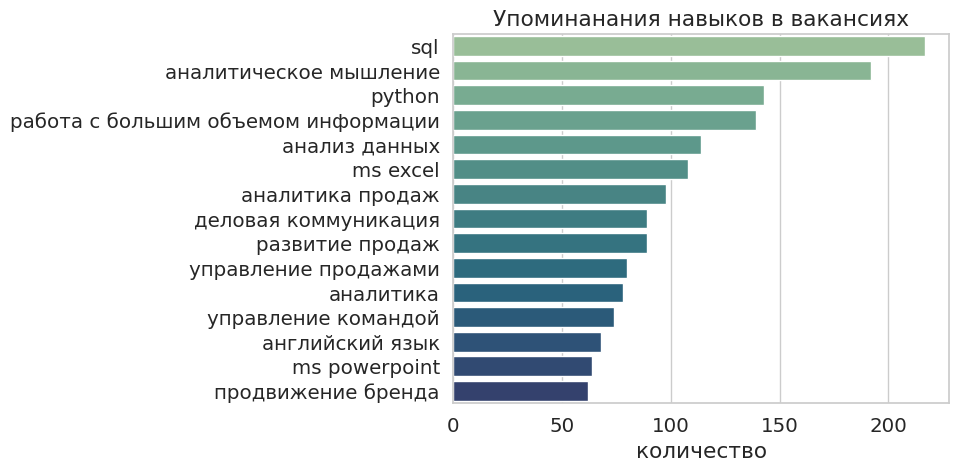

In [42]:
def plot_top(num, data):
  top_skills = sorted(data.items(), key=lambda x: x[1], reverse=True)[:num]
  skills, counts = zip(*top_skills)

  sns.barplot(x=counts, y=skills, hue=skills, palette="crest")
  plt.xlabel('количество')
  plt.title('Упоминанания навыков в вакансиях')
  plt.show()

plot_top(15, dict_skills)

**Ответ:** Ожидания подтвердились: аналитический склад ума, умение работать со стандартными для отрасли инструментами (`sql`, `python`, `excel`). Однако кроме технических навыков работодатель хочет видеть человека с лидерскими качествами, навыками сейлза.

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [164]:
# узнаем текущий курс
url = "https://www.fontanka.ru/currency.html"
df = pd.read_html(url)[0]
temp = df.loc[df['Валюта'].isin(['usd','eur']), ['Валюта','Курс']]
print(temp)

usd = float(temp['Курс'][0])
eur = float(temp['Курс'][1])

  Валюта   Курс
0    usd  91.82
1    eur  98.95


In [44]:
def change_func(x, bound):
  temp = x[f'salary.{bound}']
  if temp == None:
    return temp
  if x['salary.currency'] == 'USD':
    temp *= usd
  elif x['salary.currency'] == 'EUR':
    temp *= eur
  if x['salary.gross']:
    temp *= 1 - 0.13 # 13% НДФЛ
  return temp

def change_value(df, change_func, bound):
  return df.apply(lambda x: change_func(x, bound), axis=1)

salary_from = change_value(full_descriptions, change_func, 'from')
salary_to = change_value(full_descriptions, change_func, 'to')


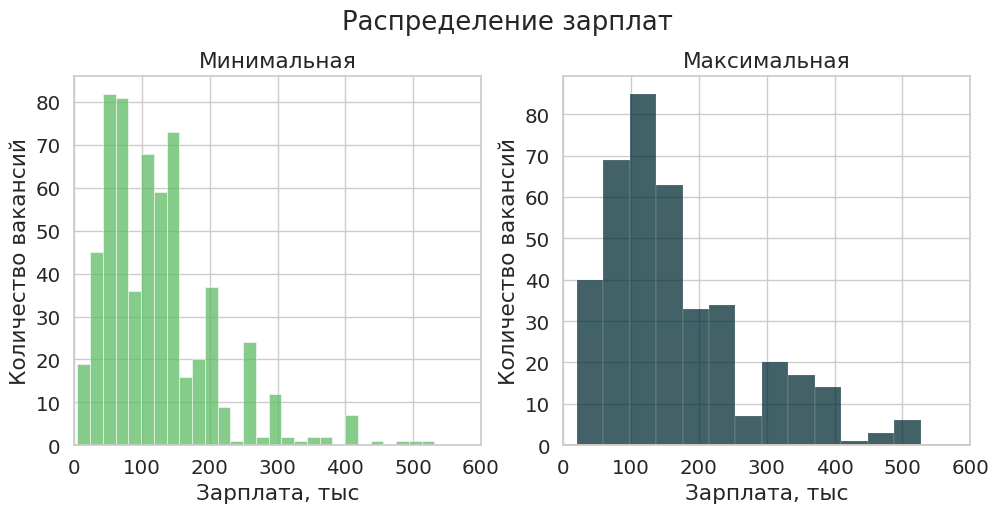

In [200]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Распределение зарплат')
fig.tight_layout(pad=1)

sns.histplot(data=salary_from / 1000, color='#5DBB63', ax=ax[0])
sns.kdeplot(data=salary_from / 1000, ax=ax[0])
sns.histplot(data=salary_to / 1000, color='#022D36', ax=ax[1])
sns.kdeplot(data=salary_to / 1000, ax=ax[1])

ax[0].set(xlabel='Зарплата, тыс', ylabel='Количество вакансий', title='Минимальная')
ax[1].set(xlabel='Зарплата, тыс', ylabel='Количество вакансий', title='Максимальная')
ax[0].set_xlim((0, 600))
ax[1].set_xlim((0, 600))

plt.show()

* Рассмотрим график нижней границы вилки. На гистограмме есть два пика: в районе $50-80$ тыс руб. и $120-160$ тыс руб., которые, возможно, обозначают зарплаты Junior и Middle разработчиков, которых на рынке легче всего найти. Далее есть несколько пиков при зарплате $>200$ тыс руб., которую получают на Senior позициях.
* График верхней границы вилки показывает, что общий уровень зарплат на рынке находится в районе $50-250$ тыс. руб., но потенциал для роста есть.
* При построении гистограмм были урезаны значения по оси абсцисс, однако есть вакансии, где предлагают $>1$ млн. руб.

**Вопрос 4.** Какой формат работы предлагается (в офисе / удаленно / ...)?

In [33]:
schedule_data = full_descriptions['schedule.name']

Поосмотрим, сколько вакансий какой график предлагают.

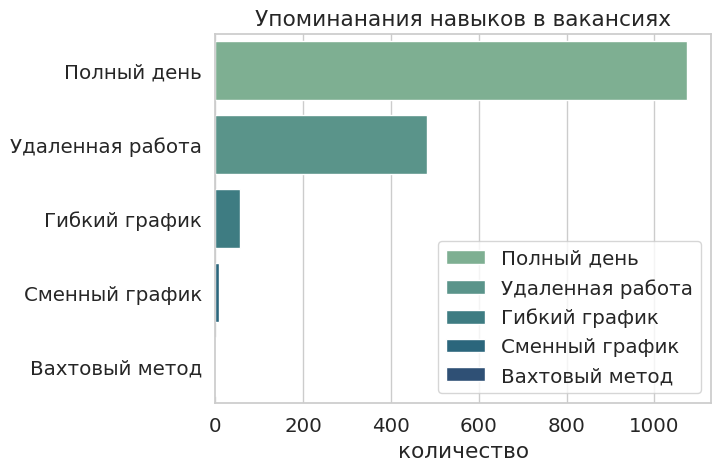

In [29]:
dict_schedule = {}
for elem in schedule_data:
  if elem not in dict_schedule.keys():
    dict_schedule[elem] = 1
  else:
    dict_schedule[elem] += 1

plot_top(len(dict_schedule.keys()), dict_schedule)

Видим, что вакансий с работой `в офисе` полный день больше всего. На втором месте `удаленная работа`. Остальные варианты представлены в совсем малом количестве.

Это может говорить о том, что работодателям привычны установившиеся типы занятости, когда человек либо полностью работает удаленно, и поэтому не занимает место в офисе, либо весь день находится на рабочем месте.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Не забывайте про выводы.

Исследуем другую профессию: `сварщик`. Будучи в школе, я периодически слышал, что сварщики могут получать большие зарплаты. Мне всегда не верилось, и вот настал момент, когда я могу это проверить.

In [45]:
URL = "https://api.hh.ru/vacancies"
text = ["сварщик"]

data = []
for vacancy in text:
  data.append(get_request(vacancy))
  time.sleep(1)

vacancies = pd.concat(data)

Удалим возможные дубликаты.

In [46]:
vacancies = vacancies.drop_duplicates(subset='id')

Загрузим подробное описание каждой вакансии.

In [48]:
full_descriptions = get_descriptions(vacancies)
full_descriptions.to_excel('vacancies_descr_welder.xlsx')

/tmp/ipykernel_30171/4219038710.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(full_desc)


In [9]:
full_descriptions = pd.read_excel('/home/daniil/IntroDS/vacancies_descr_welder.xlsx')

In [50]:
# посмотрим ана количество доступных вакансий
full_descriptions[full_descriptions['type.id'] == 'open'].shape[0]

347

Определим частовстречающиеся навыки:

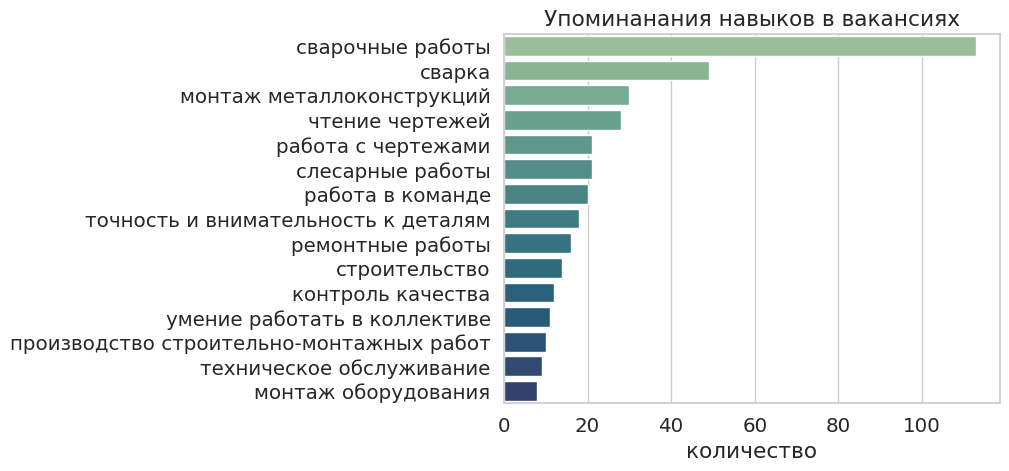

In [51]:
# удалим пустые ячейки
skills = full_descriptions.key_skills.dropna()
# приведем все к нижнему регистру
skills = skills.str.lower()

# literal_eval переводит '[1, 2, 3]' в [1, 2, 3]
dict_skills = {}
for elem in skills:
  for skill in literal_eval(elem):
    name = list(skill.values())[0]
    if name not in dict_skills.keys():
      dict_skills[name] = 1
    else:
      dict_skills[name] += 1

plot_top(15, dict_skills)

Определим зарплату, которые готовы платить работодатели.

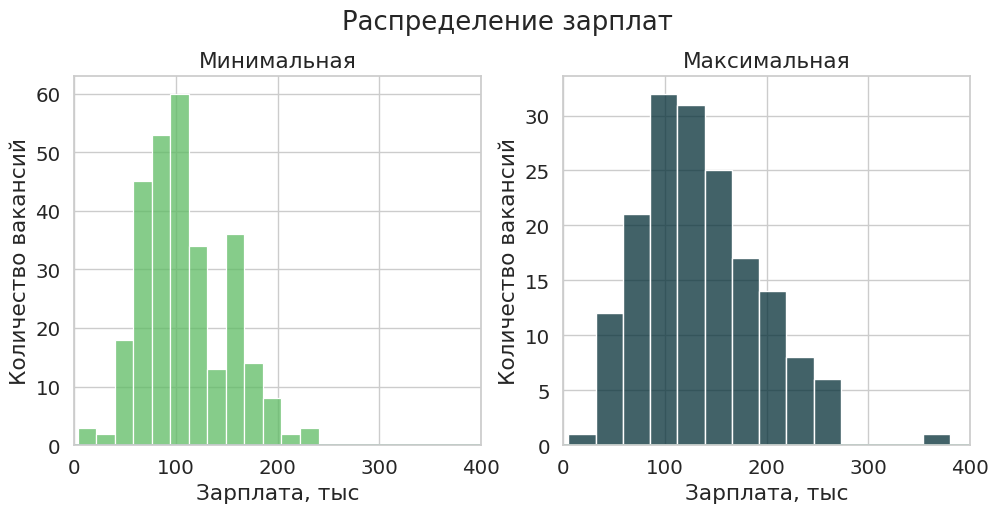

In [53]:
salary_from = change_value(full_descriptions, change_func, 'from')
salary_to = change_value(full_descriptions, change_func, 'to')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Распределение зарплат')
fig.tight_layout(pad=1)

sns.histplot(data=salary_from / 1000, color='#5DBB63', ax=ax[0])
sns.kdeplot(data=salary_from / 1000, ax=ax[0])
sns.histplot(data=salary_to / 1000, color='#022D36', ax=ax[1])
sns.kdeplot(data=salary_to / 1000, ax=ax[1])

ax[0].set(xlabel='Зарплата, тыс', ylabel='Количество вакансий', title='Минимальная')
ax[1].set(xlabel='Зарплата, тыс', ylabel='Количество вакансий', title='Максимальная')
ax[0].set_xlim((0, 400))
ax[1].set_xlim((0, 400))

plt.show()

Какой формат работы предлагают?

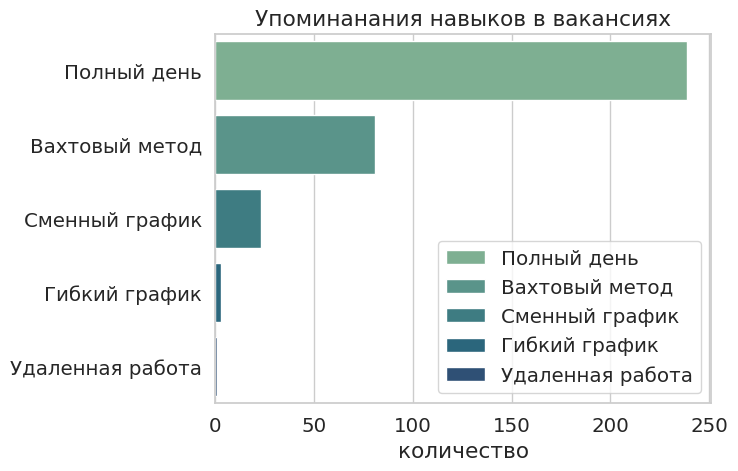

In [54]:
schedule_data = full_descriptions['schedule.name']

dict_schedule = {}
for elem in schedule_data:
  if elem not in dict_schedule.keys():
    dict_schedule[elem] = 1
  else:
    dict_schedule[elem] += 1

plot_top(len(dict_schedule.keys()), dict_schedule)

**Выводы** по анализу вакансии `сварщик`:
1. В отличие от аналитика здесь практически не нужны *social-skills*: "умение работать в коллективе" лишь на 11 месте. Это говорит о том, что специалисты этой области больше работают в одиночку.
2. Зарплаты средние: $50-150$ тыс. руб., однако есть потенциал для роста в профессии: профессионалы могут получать около $250$ тыс. руб. Дальнейший рост по зарплате, судя по всему, затруднен.
3. Поскольку работа ручная, то преобладание вакансий с занятостью в полный день неудивительна. В отличие от аналитиков, здесь вахтовый метод пользуется популярностью.

**Выводы по задаче**.
* Я потренировался с загрузкой данных из внешних ресурсов, проведя несложный первичный анализ рынка труда. 
* API - очень интересная концепция, которая упрощает доступ к данным. Уверен, навыки работы с ней стоит улучшать.

---

### <font color="green"><i>Факультативная часть</i></font>

---

### Задача 2.   

Для *одной* из рассмотренных ранее профессий исследуйте, в каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом.
Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


**Решение**

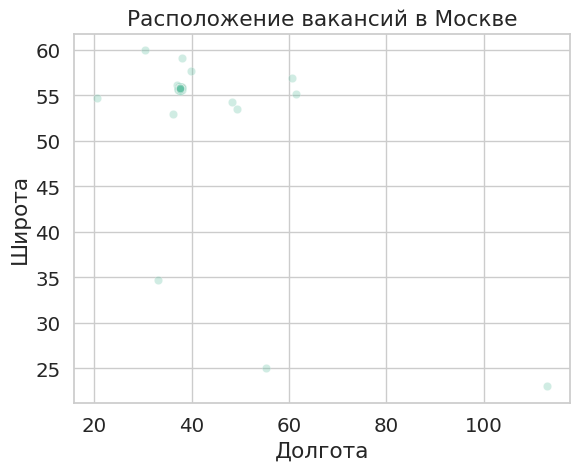

In [16]:
sns.scatterplot(data=full_descriptions, x="address.lng", y="address.lat", alpha=0.3).set(
    xlabel="Долгота", ylabel="Широта", title="Расположение вакансий в Москве"
)
plt.show()

Нас больше всего интересует скопление точек. Приблизим его.

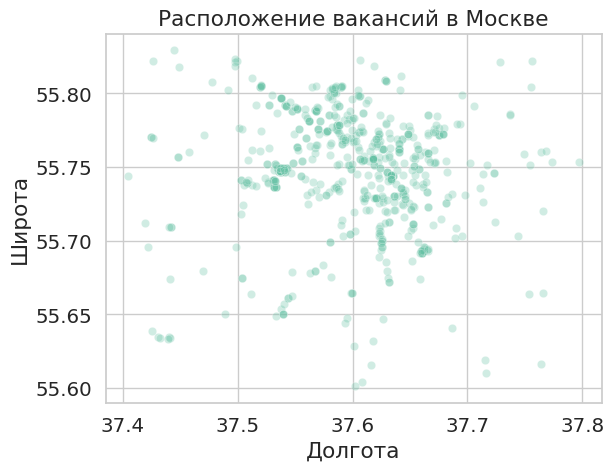

In [18]:
sns.scatterplot(
    data=full_descriptions[
        (full_descriptions['address.lng'] > 37.4)
        & (full_descriptions['address.lng'] < 37.8)
        & (full_descriptions['address.lat'] > 55.6)
        & (full_descriptions['address.lat'] < 55.83)
    ],
    x="address.lng",
    y="address.lat",
    alpha=0.3,
).set(
    xlabel="Долгота", ylabel="Широта", title="Расположение вакансий в Москве"
)
plt.show()

Нанесем эти точки на интерактивную карту города.

In [101]:
fig = px.scatter_mapbox(
    full_descriptions,
    lat="address.lat",
    lon="address.lng",
    center=dict(lat=55.75, lon=37.6),
    hover_name=full_descriptions["department.name"],
    color=full_descriptions["salary.from"],
    color_continuous_scale=["yellow", "green", "red"],
    zoom=10,
    mapbox_style="stamen-terrain",
)
fig.update_layout(mapbox_style="open-street-map")
fig.write_html("map_Moscow_vacancies.html")
fig

Заметим, что не во всех точках есть информация об имени компании или зарплате. Но поскольку это не мешает нам выполнить поиск районов Москвы, не будем лишний раз фильтровать точки, так как в этом случае их останется слишком мало для анализа.

Интерактивная карта позволит в дальнейшем определить район. Чтобы улучшить точность, построим тепловую карту вакансий.

In [95]:
# подготавливаем данные
data_coordinates = pd.DataFrame(full_descriptions, columns=["address.lng", "address.lat", "salary.from", "salary.to"])
data_coordinates["salary.from"] = data_coordinates["salary.from"] / 10000
data_coordinates["salary.to"] = data_coordinates["salary.to"] / 10000


lon = np.round(full_descriptions['address.lng'] * 4, decimals=1) * 0.25
lat = np.round(full_descriptions['address.lat']* 4, decimals=1) * 0.25

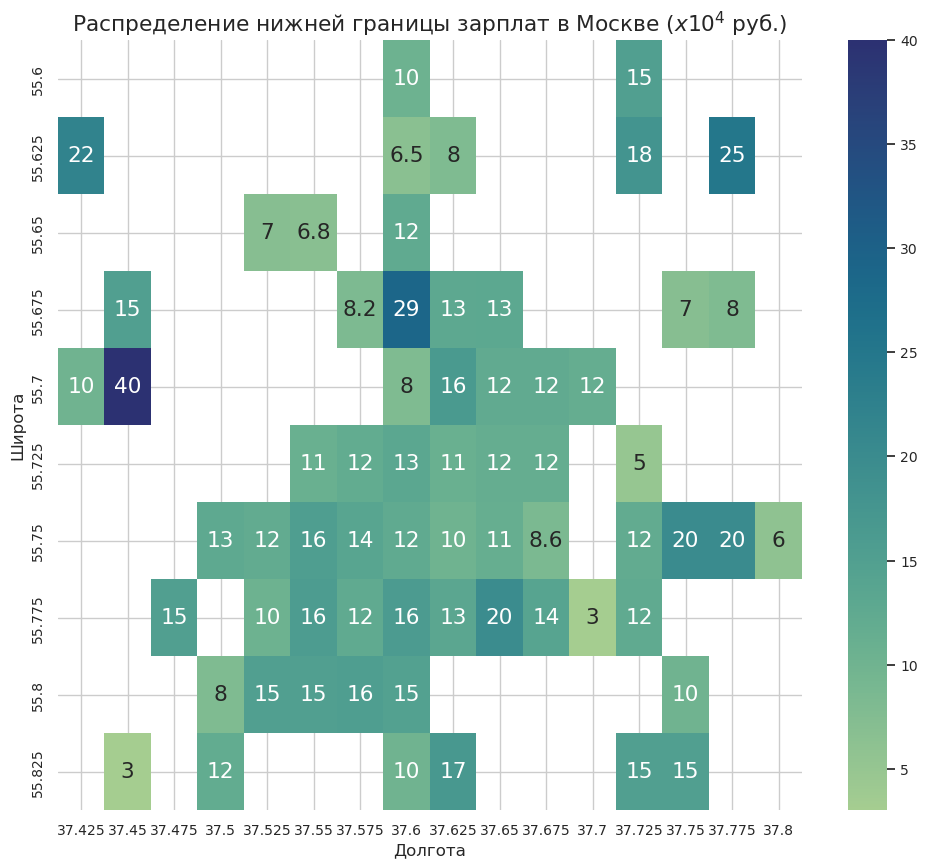

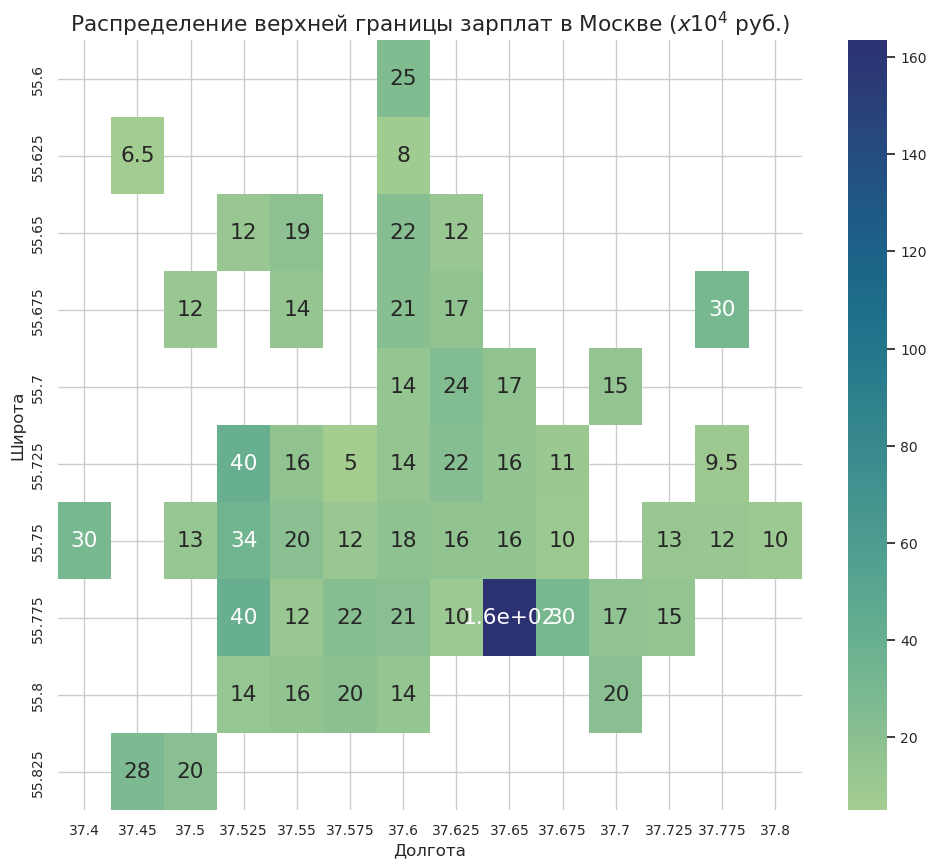

In [100]:
# для нижней границы
plt.figure(figsize=(12, 10))
piv_mean = pd.pivot_table(
    data=data_coordinates[
        (data_coordinates['address.lng'] > 37.4)
        & (data_coordinates['address.lng'] < 37.8)
        & (data_coordinates['address.lat'] > 55.6)
        & (data_coordinates['address.lat'] < 55.83)
    ],
    index=lat,
    columns=lon,
    values="salary.from",
    aggfunc="mean"
)

with plt.style.context(
    {"axes.labelsize": 12, "xtick.labelsize": 10, "ytick.labelsize": 10}
):
    ax = sns.heatmap(piv_mean, annot=True, cmap="crest").set(
        xlabel="Долгота",
        ylabel="Широта",
        title="Распределение нижней границы зарплат в Москве ($ x10^4$ руб.)",
    )
plt.show()

# для верхней границы
plt.figure(figsize=(12, 10))
piv_mean = pd.pivot_table(
    data=data_coordinates[
        (data_coordinates['address.lng'] > 37.4)
        & (data_coordinates['address.lng'] < 37.8)
        & (data_coordinates['address.lat'] > 55.6)
        & (data_coordinates['address.lat'] < 55.83)
    ],
    index=lat,
    columns=lon,
    values="salary.to",
    aggfunc="mean"
)

with plt.style.context(
    {"axes.labelsize": 12, "xtick.labelsize": 10, "ytick.labelsize": 10}
):
    ax = sns.heatmap(piv_mean, annot=True, cmap="crest").set(
        xlabel="Долгота",
        ylabel="Широта",
        title="Распределение верхней границы зарплат в Москве ($ x10^4$ руб.)",
    )
plt.show()

**Итак**, видим, что больше всего вакансий в области точки с координатами $(55.76, 37.57)$, что соответствует Пресненскому району, Арбату. Так же много вакансий на юго-востоке: Красносельский и Мещанские районы. Отсюда можно сделать вывод, что большинство вакансий находятся не в центре Москвы, но и недалеко от него: между Садовым и Третьим транспортным кольцами. 

В поиске названий районов очень помог сайт <a target="_blank" href="https://geotree.ru/?lat=55.77440&lon=37.65015&z=13&mlat=55.775&mlon=37.65&c=37.65,55.775">geotree.ru</a>.

Какие выводы можно сделать из построенных графиков?

**Выводы**
1. Мы воспользовались двумя способами построения карты, для пущей точности сверившись с geotree.ru, и выяснили что в основном вакансии размещаются в внутри Третьего транспортного кольца и недалеко от центра.
2. Из распределения вакансий можно сделать вывод, что и офисы компаний находятся тут же, т.е. недалеко от центра Москвы.

---

### Задача 3.   

**1.** Проверьте, во скольких вакансиях среди выгруженных указана зарплата?


In [118]:
from_to = len(full_descriptions.dropna(subset=["salary.from", "salary.to"]))
from_only = len(full_descriptions.dropna(subset="salary.from"))
to_only = len(full_descriptions.dropna(subset="salary.to"))

print(f"Указаны и верхняя, и нижняя границы: {from_to}")
print(f"Указаны только нижняя граница: {from_only}")
print(f"Указаны только верхняя граница: {to_only}")

Указаны и верхняя, и нижняя границы: 298
Указаны только нижняя граница: 605
Указаны только верхняя граница: 398


На основе описания вакансий с известной зарплатой попробуйте оценить ожидаемую зарплату для всех остальных вакансий. Для этого на основе текстового описания вакансии можно построить эмбеддинги (любые подходящие нейросетевые или просто one-hot кодирование). По этим эмбеддингам обучите некоторую модель предсказывать зарплату.

Не забудьте по общий пайплайн ML-моделей, а также про применимость различных методов.

**2.** Выполните кластеризацию вакансий, используя построенные эмбеддинги. Визуализируйте результаты и проинтерпретируйте кластеры.

Не забывайте про выводы.